#Gradient Descent Algorithm
Gradient descent is an optimization algorithm which is commonly-used to train machine learning models and neural networks.  Training data helps these models learn over time, and the cost function within gradient descent specifically acts as a barometer, gauging its accuracy with each iteration of parameter updates. Until the function is close to or equal to zero, the model will continue to adjust its parameters to yield the smallest possible error.

*-https://www.ibm.com/topics/gradient-descent*

---
####1- Take 10 points of a data x and y.

Make it sure that linear correlation between x and y exists.

---

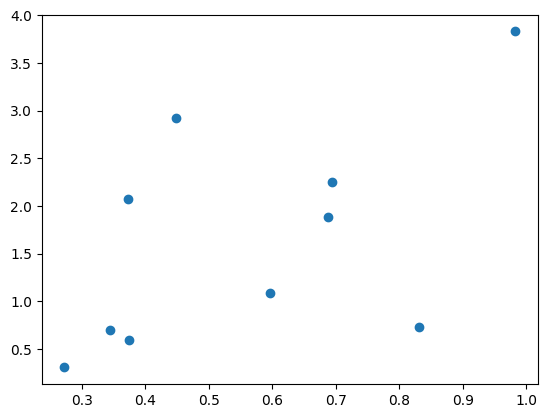

There exists a linear correlation between x and y



In [ ]:
import numpy as np
import matplotlib as mp

n = 10
x = np.random.rand(n, 1)
y = 2 * x + np.random.randn(n, 1)

mp.pyplot.scatter(x, y)
mp.pyplot.show()

def CorrelationCoefficient(x, y) : #Caculating Pearson's Correlation
  return (np.cov(x.flatten(),y.flatten())[0][1] / (np.std(x.flatten(), ddof = 1)*np.std(y.flatten(),ddof = 1)))
if(CorrelationCoefficient(x, y) == 0) :
  print("There exists no linear correlation between x and y\n")
else :
  print("There exists a linear correlation between x and y\n")

---
####2- Let $h_θ(x) = θ_1 + θ_0x$

This is the hypothesis model based on Linear Regression.

---

In [ ]:
def htheta(_x,theta0,theta1) :
  return theta0 * _x + theta1
htheta(1,1,1)
#Need of Correction in Manual

2

---
####3- Make a function $J(θ_0,θ_1)=\frac{1}{2m}Σ^{i=m}_{i=1}(h_0(x^{(i)})-y^{(i)})^2,$
Where m is the number of data points and each data points can be read as (xi
$,$ yi)

For $i=1,2,3,.....,m$

---

In [ ]:
def J(theta0, theta1) :
  val = 0
  for xi, yi in zip(x,y):
    val += (htheta(xi,theta0,theta1) - yi)**2
  return (1 / (2*n) * val)
print(J(1,2))

[2.55206326]


---
####4- Write definition, an example equation and a picture of a convex function.

---

If the line segment between any two distinct points on the graph of a function lies above the graph between the two points, the function is called a Convex function. A notable point about a convex function is that its Hessian Matrix determines its convexity. For example, if the Matrix is positive definite, then the graph will be curved. Similarly, if a the Matrix is positive semi-definite, then the graph may be curved or may be flat. However, if the Matrix is negative definite or negative semi-definite, then it turns into a negative convex graph or more commonly known as a concave function.

Example Function: $y = x^2$

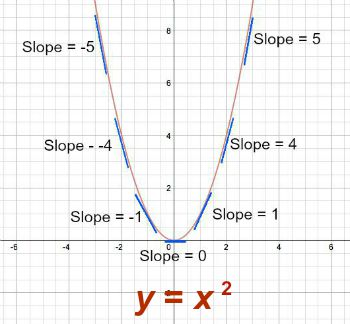

---
####5- Your objective is to find the values of $θ_0, θ_1$ for which value of J will be minimum
Gradient Descent is an iterative procedure in which you will update $θ_0, θ_1$ to get a better
minimum $J$. Stopping criteria of procedure will be decided from knowledge obtained by tutorial.

---

In [ ]:
from tabulate import tabulate
def GradientDescent(x, y, theta0, theta1, alpha = 0.2) :
  dldtheta0 = 0.0
  dldtheta1 = 0.0
  dldtheta0 = -(2/n)*np.sum(x*(y-htheta(x,theta0,theta1)))
  dldtheta1 = -(2/n)*np.sum(y-htheta(x,theta0,theta1))
  theta0 = theta0 - alpha*dldtheta0
  theta1 = theta1 - alpha*dldtheta1
  return theta0, theta1
theta0 = 10.0
theta1 = 10.0
max_iter = 1000
tol = 10**-30
valtol = 10**-15
table = []
flag = 0
plotdata = []
for i in range(max_iter): 
  Cost = J(theta0, theta1)
  plotdata.append([Cost[0],theta0,theta1])
  _theta0, _theta1 = GradientDescent(x,y,theta0,theta1)
  if Cost < tol : 
    flag = 1
    break
  if (abs(_theta0 - theta0) < valtol and abs(_theta1 - theta1) < valtol) : 
    flag = 1
    break
  theta0 = _theta0
  theta1 = _theta1
  table.append([i, Cost, theta0, theta1])


---
#6- What should be submitted
a) Plot of $J(θ_0, θ_1)$on python with a point specifying value of $J$ at initially taken $θ_0$ and $θ_1$.

b) A table with columns $J, θ_0$ and $θ_1$ and at each iteration make a plot of $J(θ_0, θ_1)$ on which
value of $J$ should be marked at updated $(θ0, θ1)$ to see how far are you from your objective.
Working of each iteration should also be submitted.

---

|   Iteration |      Cost |      θ0 |           θ1 |
|-------------|-----------|---------|--------------|
|           0 | 99.2225   | 6.72635 |  4.41553     |
|           1 | 22.2428   | 5.17953 |  1.79811     |
|           2 |  5.26139  | 4.44387 |  0.574141    |
|           3 |  1.51477  | 4.08933 |  0.00453908  |
|           4 |  0.68756  | 3.91392 | -0.257807    |
|           5 |  0.504348 | 3.82277 | -0.375925    |
|           6 |  0.463214 | 3.77134 | -0.426379    |
|           7 |  0.453443 | 3.73868 | -0.445131    |
|           8 |  0.45061  | 3.71497 | -0.449067    |
|           9 |  0.449329 | 3.69559 | -0.446119    |
|          10 |  0.448408 | 3.67837 | -0.440009    |
|          11 |  0.447587 | 3.66228 | -0.432485    |
|          12 |  0.446806 | 3.64685 | -0.424367    |
|          13 |  0.446052 | 3.63184 | -0.416039    |
|          14 |  0.445321 | 3.61715 | -0.407681    |
|          15 |  0.444612 | 3.60272 | -0.399375    |
|          16 |  0.443925 | 3.58853 | -0.39116

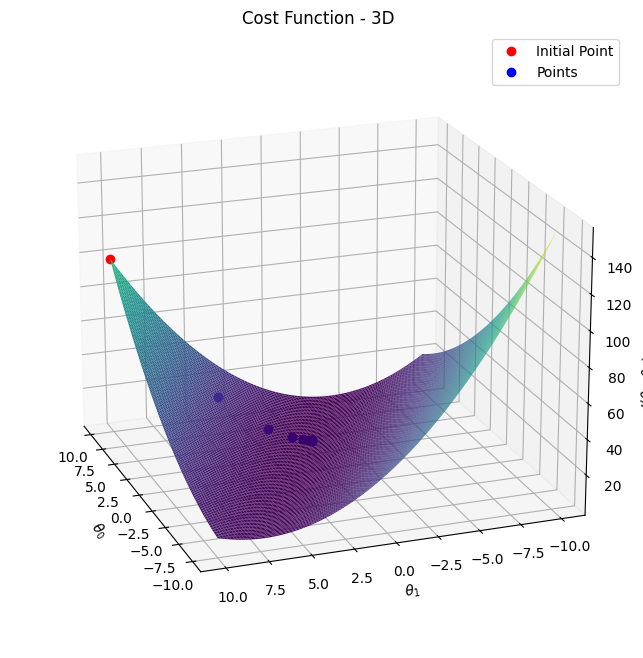

In [ ]:
#Part A
xaxis = np.linspace(-10, 10, 100)
yaxis = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(xaxis, yaxis)
Z = J(X, Y)

fig = mp.pyplot.figure(figsize = (10,8))
ax = mp.pyplot.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Cost Function - 3D');
ax.set_xlabel('$θ_0$')
ax.set_ylabel('$θ_1$')
ax.set_zlabel('$J(θ_0,θ_1)$')
for i in range(n) :
  if i == 0:
    ax.plot(plotdata[i][1], plotdata[i][2], plotdata[i][0], 'ro', label = 'Initial Point')
  else :
    ax.plot(plotdata[i][1], plotdata[i][2], plotdata[i][0], 'bo')
ax.plot(plotdata[n-1][1], plotdata[n-1][2], plotdata[n-1][0], 'bo', label = "Points")
mp.pyplot.legend()
ax.view_init(20, 160)

#Part B
print(tabulate(table,headers=['Iteration','Cost','θ0','θ1'],tablefmt="github"))
if flag : print("Tolerance level exceeded! Halting Execution!")

---
####7- Draw a scatter plot of x and y with the plot of line $y = θ_0 + θ_1x,$ where $θ_0$ and $θ_1$ are your final values obtained after the last iteration of gradient descent method.

---

y =  -0.49550662423834846 *x +  0.8440875415117637


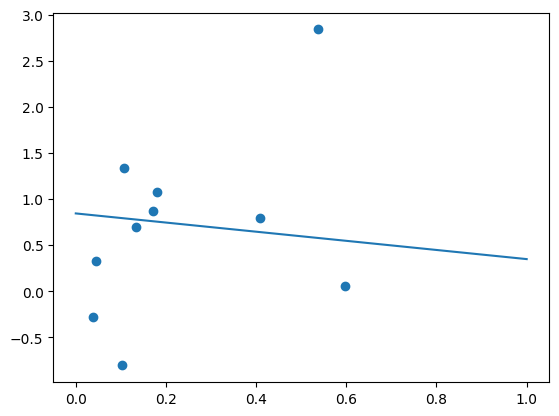

In [ ]:
print("y = ", theta0, "*x + ", theta1)
mp.pyplot.scatter(x, y)

_x = np.linspace(0,1)
_y = theta0 * _x + theta1

mp.pyplot.plot(_x, _y)
mp.pyplot.show()